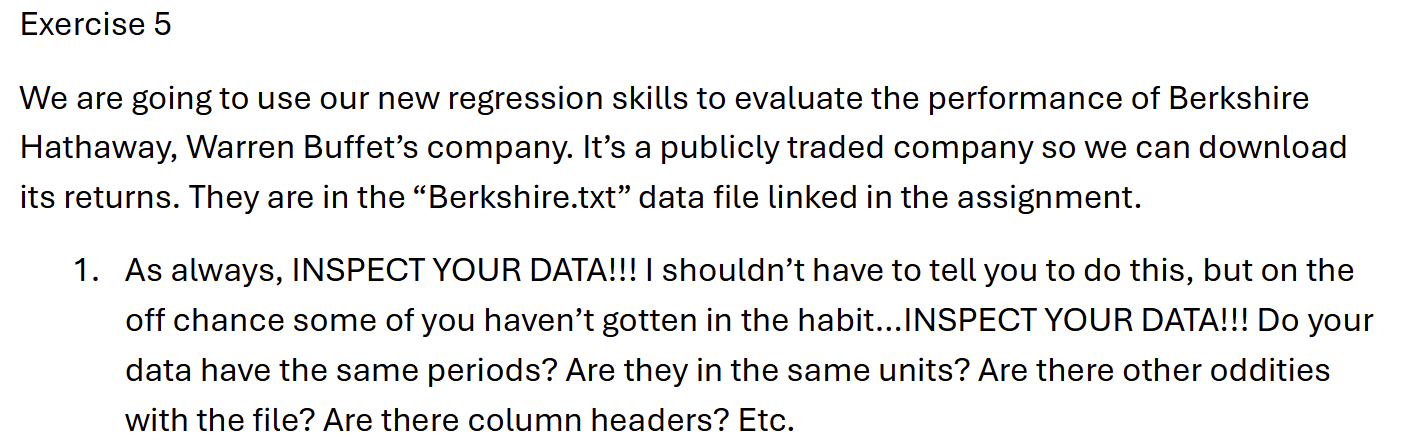

In [27]:
import pandas as pd
import numpy as np

In [28]:
df_berk = pd.read_csv("berkshire.txt", delimiter="\t", header=None)
df_FF3 = pd.read_csv("FF3factors.txt", delimiter="\t", header=None)

df_berk.columns = (["YYYY/MM/DD","Returns"])

df_FF3.columns = ["Year", 
                  "Month", 
                  "Market Excess (Mkt Return - r_f)",  
                  "SMB (ME1-ME5)", 
                  "HML (BM5--value -BM1--growth)",
                  "Risk-free rate r_f"]

In [ ]:
# Cleaning of df_FF3
for i in range(len(df_FF3.columns)):
    df_FF3[df_FF3.columns[i]] = pd.to_numeric(df_FF3[df_FF3.columns[i]])

df_FF3.iloc[:, 2:]=df_FF3.iloc[:, 2:]/100

# Cleaning of df_berk
for i in range(len(df_berk.columns)):
    df_berk[df_berk.columns[i]] = pd.to_numeric(df_berk[df_berk.columns[i]])

df_berk["YYYY/MM/DD"] = pd.to_datetime(df_berk['YYYY/MM/DD'], format='%Y%m%d', errors='coerce')

In [30]:
# Getting both df to same dates

DateFilter_FF3 = (
    (df_FF3["Year"] > 1976) |
    ((df_FF3["Year"] == 1976) & (df_FF3["Month"] >= 11))
) & (
    (df_FF3["Year"] < 2019) |
    ((df_FF3["Year"] == 2019) & (df_FF3["Month"] <= 12))
)
df_FF3 = df_FF3[DateFilter_FF3]

display(df_FF3)

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f
604,1976,11,0.0036,0.0232,0.0152,0.0040
605,1976,12,0.0565,0.0300,0.0221,0.0040
606,1977,1,-0.0405,0.0478,0.0426,0.0036
607,1977,2,-0.0194,0.0108,0.0050,0.0035
608,1977,3,-0.0137,0.0099,0.0102,0.0038
...,...,...,...,...,...,...
1117,2019,8,-0.0258,-0.0243,-0.0493,0.0016
1118,2019,9,0.0143,-0.0099,0.0678,0.0018
1119,2019,10,0.0206,0.0027,-0.0209,0.0015
1120,2019,11,0.0387,0.0085,-0.0187,0.0012


In [31]:
df_berk

,YYYY/MM/DD,Returns
0,1976-11-30,0.154412
1,1976-12-31,0.146497
2,1977-01-31,0.000000
3,1977-02-28,0.000000
4,1977-03-31,0.077778
...,...,...
513,2019-08-30,-0.018104
514,2019-09-30,0.028884
515,2019-10-31,0.022791
516,2019-11-29,0.036233


In [32]:
# df_FF3['Date'] = df_berk["YYYY/MM/DD"]
# df_FF3.drop(columns=["Year", "Month"], axis=1, inplace=True)
# display(df_FF3)


In [33]:
df_berk["ret_excess_berk"] = df_berk["Returns"] - df_FF3["Risk-free rate r_f"]
display(df_berk)
n  = df_berk["ret_excess_berk"].shape[0]
mu = df_berk["ret_excess_berk"].mean()                           # average monthly risk premium
se = df_berk["ret_excess_berk"].std(ddof=1) / np.sqrt(n)         # standard error of the mean
t  = mu / se                                         # t-stat for H0: mean=0
print(n)
print(mu)
print(se)
print(t)

# Optional annualization (report both if you want):
ann_mu = 12 * mu
ann_sd = np.sqrt(12) * df_berk["ret_excess_berk"].std(ddof=1)
print(ann_sd)


,YYYY/MM/DD,Returns,ret_excess_berk
0,1976-11-30,0.154412,NaN
1,1976-12-31,0.146497,NaN
2,1977-01-31,0.000000,NaN
3,1977-02-28,0.000000,NaN
4,1977-03-31,0.077778,NaN
...,...,...,...
513,2019-08-30,-0.018104,NaN
514,2019-09-30,0.028884,NaN
515,2019-10-31,0.022791,NaN
516,2019-11-29,0.036233,NaN


518
nan
nan
nan
nan


In [34]:
df_berk['YYYYMM'] = df_berk['YYYY/MM/DD'].astype(str).str[:6]
df_FF3['YYYYMM'] = df_FF3['Year'].astype(str) + df_FF3['Month'].astype(str).str.zfill(2)

merged_df = pd.merge(df_berk, df_FF3, on='YYYYMM', how='inner')

In [35]:
df_berk

,YYYY/MM/DD,Returns,ret_excess_berk,YYYYMM
0,1976-11-30,0.154412,NaN,1976-1
1,1976-12-31,0.146497,NaN,1976-1
2,1977-01-31,0.000000,NaN,1977-0
3,1977-02-28,0.000000,NaN,1977-0
4,1977-03-31,0.077778,NaN,1977-0
...,...,...,...,...
513,2019-08-30,-0.018104,NaN,2019-0
514,2019-09-30,0.028884,NaN,2019-0
515,2019-10-31,0.022791,NaN,2019-1
516,2019-11-29,0.036233,NaN,2019-1


In [36]:
df_FF3

,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f,YYYYMM
604,1976,11,0.0036,0.0232,0.0152,0.0040,197611
605,1976,12,0.0565,0.0300,0.0221,0.0040,197612
606,1977,1,-0.0405,0.0478,0.0426,0.0036,197701
607,1977,2,-0.0194,0.0108,0.0050,0.0035,197702
608,1977,3,-0.0137,0.0099,0.0102,0.0038,197703
...,...,...,...,...,...,...,...
1117,2019,8,-0.0258,-0.0243,-0.0493,0.0016,201908
1118,2019,9,0.0143,-0.0099,0.0678,0.0018,201909
1119,2019,10,0.0206,0.0027,-0.0209,0.0015,201910
1120,2019,11,0.0387,0.0085,-0.0187,0.0012,201911


In [37]:
merged_df

,YYYY/MM/DD,Returns,ret_excess_berk,YYYYMM,Year,Month,Market Excess (Mkt Return - r_f),SMB (ME1-ME5),HML (BM5--value -BM1--growth),Risk-free rate r_f


In [ ]:


df_berk['YYYYMM'] = df_berk['YYYY/MM/DD'].astype(str).str[:6]
df_FF3['YYYYMM'] = df_FF3['Year'].astype(str) + df_FF3['Month'].astype(str).str.zfill(2)

merged_df = pd.merge(df_berk, df_FF3, on='YYYYMM', how='inner')